<a href="https://colab.research.google.com/github/Shaikha3008/ChairtyML/blob/main/imageclassifier2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
#import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict 

In [ ]:
# Define transforms
data_transform =  transforms.Compose([
            transforms.Resize(size=224),
        transforms.RandomHorizontalFlip(),
        #transforms.RandomRotation(30),
        transforms.CenterCrop(224),
        transforms.ToTensor()
         ])

#making sure download=true!!
# Create training set and define training dataloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=data_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,shuffle=True, num_workers=2)
# Create test set and define test dataloader
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=data_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,shuffle=False, num_workers=2)
# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

cat


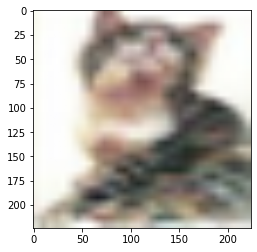

frog


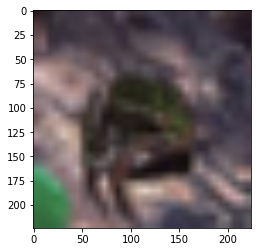

car


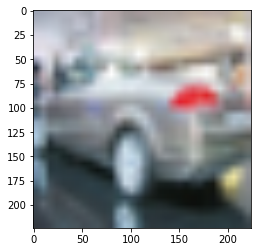

ship


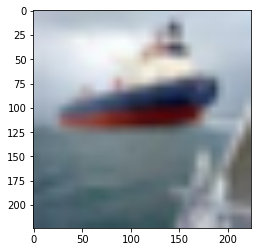

frog


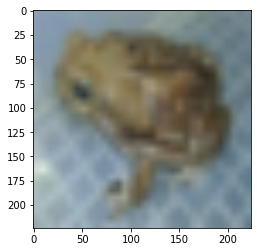

In [ ]:
# Explore data

show5(trainloader)

In [ ]:
#created classifier... tried to follow the same concept in any other pretrained dataset
class sh_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        #as mnay layers as I could fit
        #https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/

        """        
        self.fc1 = nn.AdaptiveMaxPool2d (1028, 256)
        self.fc2 = nn.AdaptiveMaxPool2d (256, 128)
        self.fc3 = nn.AdaptiveMaxPool2d (128, 64)
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.conv_layer6 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
       
        self.conv_layer3 = nn.Conv2d(in_channels=25, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        """
        self.fc1 = nn.Linear(147456 , 3072)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(3072, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 50)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(50, 10) 

        self.dropout = nn.Dropout(0.5)
    # Progresses data across layers    
    def forward(self, x):


        x = x.view(x.shape[0], -1)
        x = self.dropout(self.fc1(x))
        x = self.dropout(self.fc2(x))
        x = self.dropout(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x


In [ ]:
module = sh_classifier()
for p in module.parameters():
    p.requires_grad = False

if torch.cuda.is_available():
    module.cuda()
criterion = nn.NLLLoss()
#learning rate is set to 0.001 momentum = 0.9
optimizer = optim.Adam(module.parameters(), lr=0.001)

In [ ]:
#I am using AI with python image classification project that I worked on previously: https://github.com/Shaikha3008/ImageClassifier

In [ ]:

num_epoch = 20
runloss = 0
#steps = 0
#print_every = 5000

for epoch in range(num_epoch):
    for images, labels in trainloader:
      #start run loss process
        #steps += 1
        # Move input and label tensors to the right device
        images, labels = images.to('cuda'), labels.to('cuda')
        #pmod = module.forward(images)
        #pmod = module(images)  
        optimizer.zero_grad()      
        outputs = module.forward(images)
        trloss = criterion(outputs, labels)
        trloss.backward()
        optimizer.step()
        runloss += trloss.item()

        #the print every is a very big value since the dataset is huge
        #if steps % print_every == 0:
    else:
      #start test process
            testloss = 0
            accuracy = 0
            module.eval()
            with torch.no_grad():
                for images, labels in testloader:
                    images, labels = images.to('cuda'), labels.to('cuda')
                    modlog = module(images)
                    testloss += criterion(modlog, labels)
                    #testloss += tsloss.item()

                    # Calculate accuracy
                    exps = torch.exp(modlog)
                    top_pre, top_class = exps.topk(1, dim=1)
                    matchs = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(matchs.type(torch.FloatTensor)).item()
            module.train()      
            print(f"Epoch {epoch+1}/{num_epoch}.."
                  f"Loss on Training is: {runloss[-1]:.3f}.. "
                  f"Validation loss: {testloss[-1]:.3f}.. "
                  f"Validation accuracy is.. *100 for % :): {accuracy/len(testloader):.3f}")
            runloss = 0
            
print("training is done")

RuntimeError: ignored

In [ ]:
#plt.plot(runloss, label='Training loss')

#plt.legend
import matplotlib.pyplot as plt

plt.plot(runloss, label='Training loss')
plt.plot(testloss, label='Validation loss')
plt.plot(accuracy, label='Validation acc')
plt.legend(frameon=False)
plt.ylabel('Loss');
plt.xlabel('Epoch');

In [ ]:
# Do validation on the test set
#https://stackoverflow.com/questions/53570334/documentation-for-pytorch-tocpu-or-tocuda
with torch.no_grad():
    module.eval()
#itterate through the data! 
    for data in testloader:
     #validate from the data set on trainloader!!   
        insert, labels = data
        insert = insert.to('cuda')
        labels =  labels.to('cuda')
        outputs = module(insert)

        #prepare the predict function
        #get the most match by getting the MAX 
        _, predict = torch.max(outputs.data, 1)
        
#initialize and define the variables
        finalresult = 0.0
        accuraz = 0.0
#to figure out the total of all labels! 
        finalresult += labels.size(0)
#if the prediction matches the label.. then sum it up to the accuraz!this way we can use this variable to get the ratio
        accuraz += (predict == labels).sum().item()
#accuracy displayed here
print('the accuracy is: %d%%' % ( (accuraz / finalresult)*100))

In [ ]:
"""
#module.class_to_idx = image_datasets['train'].class_to_idx
#If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, optimizer.state_dict
torch.save(
    #prepared the checkpoint and stated the needed features
    {
            #'structure' :'vgg16',
            'hidden_layer1':256,
            'hidden_layer2':100,
             'droupout':0.5,
             'module.classifier': module.classifier,
             #'class_to_idx':module.class_to_idx,
             'state_dict':module.state_dict(),
             'optimizer_dict':optimizer.state_dict()
           },
             'chckpnt.pth'
)
"""

In [ ]:
""" 
answer while using vgg16..  
My model's accuracy is pretty good but the runtime is very hectic..
 if Detectocorp can insure us with very minor runtime we can go for it and purchase it..
  but in my opinion the pretrained models that exists are not bad at all to make us go for this one..
   unless it can offer more benefits than just better accuracy.. adding parameters and layers helped in improving accuracy but costing us time.. 
   if time is not in considedration we can add more layers and get better accuracy 
   for sh_classifier : -- 
"""